<a href="https://colab.research.google.com/github/2003UJAN/Brain-Tumor-Classification/blob/main/Brain_Tumor_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'medical-mnist:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F614679%2F1099232%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240527%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240527T184819Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D112961b0db6d6bbb91332781b4fb1cc99f964e740e00d46c257d7c8081d9931c126d3647df33774c7951abe57069f6ce3f6003607fa47664054367c6bd5b78f1e37bd90e2cfb7bc40547269f91f6ccd5e98effbcc7449f1c08aae25c80b487d768cb9e75264652040ca1c9057b01a05f67722ed0be7b1b44de2696f2fda710e468e83cafc0250fca025b5fdc95352a25e28d216a4528869a36ffbb65b062865b4cca82c8a8113cc9e26acfee10e4f68e1f857ca0674fac19c66f2158d9371c94474cf7bc4e09fbee5d0fd3e8a02a508cd59c2da651a5524a97c32597f36200611347712ed0fb7d6e46aa808e191a48f8c290fbeab3b011285ab571e78c280a19'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 88933634 bytes downloaded
Downloaded and uncompressed: medical-mnist
Data source import complete.


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


Streaming output truncated to the last 5000 lines.
/kaggle/input/medical-mnist/Hand/003256.jpeg
/kaggle/input/medical-mnist/Hand/005761.jpeg
/kaggle/input/medical-mnist/Hand/000796.jpeg
/kaggle/input/medical-mnist/Hand/003918.jpeg
/kaggle/input/medical-mnist/Hand/009751.jpeg
/kaggle/input/medical-mnist/Hand/001222.jpeg
/kaggle/input/medical-mnist/Hand/000134.jpeg
/kaggle/input/medical-mnist/Hand/006295.jpeg
/kaggle/input/medical-mnist/Hand/005423.jpeg
/kaggle/input/medical-mnist/Hand/006666.jpeg
/kaggle/input/medical-mnist/Hand/004719.jpeg
/kaggle/input/medical-mnist/Hand/001954.jpeg
/kaggle/input/medical-mnist/Hand/002804.jpeg
/kaggle/input/medical-mnist/Hand/006223.jpeg
/kaggle/input/medical-mnist/Hand/002731.jpeg
/kaggle/input/medical-mnist/Hand/005116.jpeg
/kaggle/input/medical-mnist/Hand/004197.jpeg
/kaggle/input/medical-mnist/Hand/009847.jpeg
/kaggle/input/medical-mnist/Hand/001714.jpeg
/kaggle/input/medical-mnist/Hand/006607.jpeg
/kaggle/input/medical-mnist/Hand/007785.jpeg
/kag

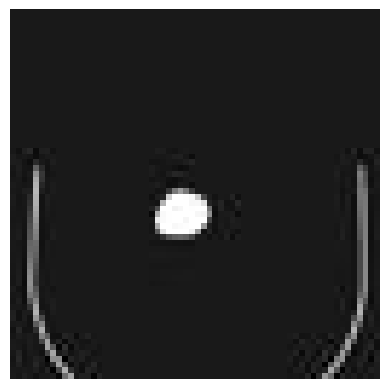

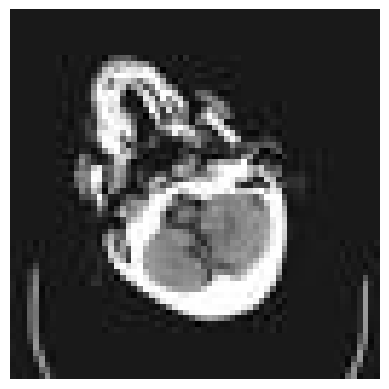

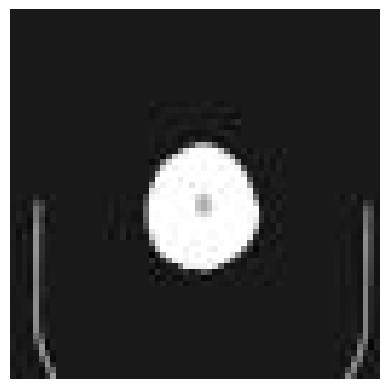

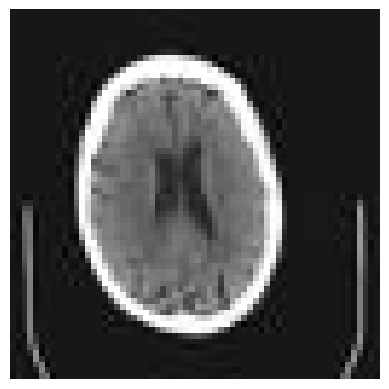

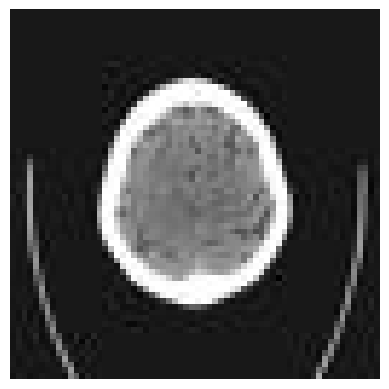

In [3]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Path to the dataset root directory
path = "/kaggle/input"

# Collect file paths and labels
file_paths = []
file_labels = []

for root, dirs, files in os.walk(path):
    p = os.path.basename(root)
    for file in files:
        file_paths.append(os.path.join(root, file))
        file_labels.append(p)

# Display the first few "HeadCT" images
num_images_to_display = 5  # Set the number of images to display
count = 0

for path, label in zip(file_paths, file_labels):
    if label == "HeadCT":
        img = Image.open(path)
        plt.figure()
        plt.imshow(img, cmap="gray")
        plt.axis("off")
        plt.show()

        count += 1
        if count >= num_images_to_display:
            break



In [4]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split

# Load and preprocess data
data_path = "/kaggle/input"
image_paths = []
labels = []

for root, dirs, files in os.walk(data_path):
    p = os.path.basename(root)
    for file in files:
        image_paths.append(os.path.join(root, file))
        labels.append(p)

# Preprocess images for RF
def preprocess_image_rf(image):
    resized_image = image.resize((64, 64))
    gray_image = resized_image.convert("L")
    image_array = np.array(gray_image)
    normalized_image = image_array / 255.0
    return normalized_image

# Preprocess images for GAN
def preprocess_image_gan(image):
    resized_image = image.resize((128, 128))  # Resize for GAN
    normalized_image = np.array(resized_image) / 127.5 - 1.0  # Normalize to -1 to 1 range
    return normalized_image

# Process images and split data
train_images_rf, test_images_rf, train_images_gan, test_images_gan, train_labels, test_labels = [], [], [], [], [], []

for image_path, label in zip(image_paths, labels):
    image = Image.open(image_path)
    processed_image_rf = preprocess_image_rf(image)
    processed_image_gan = preprocess_image_gan(image)

    if label == "HeadCT":
        if np.random.rand() < 0.8:  # 80% for training
            train_images_rf.append(processed_image_rf)
            train_images_gan.append(processed_image_gan)
            train_labels.append(label)
        else:
            test_images_rf.append(processed_image_rf)
            test_images_gan.append(processed_image_gan)
            test_labels.append(label)

# Convert to numpy arrays
train_images_rf = np.array(train_images_rf)
test_images_rf = np.array(test_images_rf)
train_images_gan = np.array(train_images_gan)
test_images_gan = np.array(test_images_gan)

# Flatten the images for RF feature extraction
train_images_rf_flattened = train_images_rf.reshape(train_images_rf.shape[0], -1)
test_images_rf_flattened = test_images_rf.reshape(test_images_rf.shape[0], -1)

# Print some statistics
print("Number of training images (RF):", len(train_images_rf))
print("Number of testing images (RF):", len(test_images_rf))
print("Number of training images (GAN):", len(train_images_gan))
print("Number of testing images (GAN):", len(test_images_gan))
print("Image shape (RF):", train_images_rf[0].shape)
print("Image shape (GAN):", train_images_gan[0].shape)

# Now you have preprocessed train_images_rf, test_images_rf, train_images_gan, test_images_gan, train_labels, and test_labels


Number of training images (RF): 7973
Number of testing images (RF): 2027
Number of training images (GAN): 7973
Number of testing images (GAN): 2027
Image shape (RF): (64, 64)
Image shape (GAN): (128, 128)


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train RF model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(train_images_rf_flattened, train_labels)

# Evaluate RF model
rf_predictions = rf_model.predict(test_images_rf_flattened)
rf_accuracy = accuracy_score(test_labels, rf_predictions)
print("RF Accuracy:", rf_accuracy)


RF Accuracy: 1.0


In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, Flatten

# Define GAN architecture
generator = Sequential([
    Dense(256, activation='relu', input_dim=train_images_gan.shape[1]),
    Dense(512, activation='relu'),
    Dense(1024, activation='relu'),
    Dense(128 * 128 * 1, activation='tanh')  # Adjust this layer to match the output shape
])

discriminator = Sequential([
    Flatten(input_shape=(128, 128, 1)),
    Dense(1024, activation='relu'),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile discriminator
discriminator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Compile GAN
gan_input = tf.keras.layers.Input(shape=(train_images_gan.shape[1],))
generated_image = generator(gan_input)
reshaped_image = Reshape((128, 128, 1))(generated_image)
gan_output = discriminator(reshaped_image)
gan = tf.keras.models.Model(gan_input, gan_output)
gan.compile(loss='binary_crossentropy', optimizer='adam')

In [7]:
# GAN Training
epochs = 50
batch_size = 64

image_shape = (128, 128, 1)

for epoch in range(epochs):
    for _ in range(train_images_gan.shape[0] // batch_size):
        noise = np.random.normal(0, 1, (batch_size, train_images_gan.shape[1]))
        generated_images = generator.predict(noise)
        generated_images = generated_images.reshape((-1,) + image_shape)  # Reshape to match discriminator input shape

        real_images = train_images_gan[np.random.randint(0, train_images_gan.shape[0], batch_size)]
        real_images = real_images.reshape((-1,) + image_shape)  # Reshape real images

        combined_images = np.concatenate([generated_images, real_images])
        combined_labels = np.concatenate([np.zeros((batch_size, 1)), np.ones((batch_size, 1))])

        d_loss = discriminator.train_on_batch(combined_images, combined_labels)

        noise = np.random.normal(0, 1, (batch_size, train_images_gan.shape[1]))
        misleading_targets = np.ones((batch_size, 1))

        a_loss = gan.train_on_batch(noise, misleading_targets)

    print(f"Epoch {epoch+1}, D Loss: {d_loss[0]}, G Loss: {a_loss}")

Streaming output truncated to the last 5000 lines.
2/2 [==============================] - 0s 5ms/step
Epoch 11, D Loss: 5.9280171394348145, G Loss: 0.11281894892454147
2/2 [==============================] - 0s 5ms/step
Epoch 12, D Loss: 6.111649513244629, G Loss: 0.11184483766555786
2/2 [==============================] - 0s 3ms/step
Epoch 13, D Loss: 5.1214423179626465, G Loss: 0.08532565832138062
2/2 [==============================] - 0s 4ms/step
Epoch 14, D Loss: 5.799319267272949, G Loss: 0.11576780676841736
2/2 [==============================] - 0s 4ms/step
Epoch 15, D Loss: 5.687432289123535, G Loss: 0.12165459990501404
2/2 [==============================] - 0s 4ms/step
Epoch 16, D Loss: 5.8059773445129395, G Loss: 0.11911441385746002
2/2 [==============================] - 0s 3ms/step
Epoch 17, D Loss: 5.845481872558594, G Loss: 0.11909233778715134
2/2 [==============================] - 0s 9ms/step
Epoch 18, D Loss: 5.951588153839111, G Loss: 0.12022057920694351
2/2 [=============

1/1 [==============================] - 0s 89ms/step


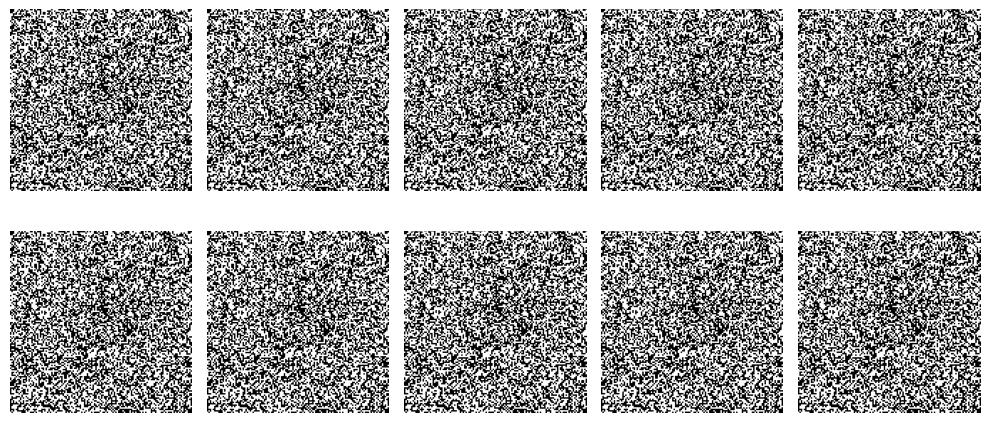

In [8]:
import matplotlib.pyplot as plt

# Generate synthetic images using the trained generator
num_samples = 10  # Number of synthetic images to generate
noise = np.random.normal(0, 1, (num_samples, train_images_gan.shape[1]))
generated_images = generator.predict(noise)
generated_images = generated_images.reshape((-1,) + image_shape)

# Visualize generated images
plt.figure(figsize=(10, 5))
for i in range(num_samples):
    plt.subplot(2, num_samples // 2, i + 1)
    plt.imshow(generated_images[i, :, :, 0], cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()